# Nucleus Prediction from Transmitted Light Images
## CZI file loading and processing

Load CZI image into loader class that represents each channel as a numpy array.

In [1]:
import gen_util
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fname = './test_images/20161209_C01_001.czi'
czi_loader = gen_util.CziLoader(fname)

Sweep the z axis, displaying transmitted light and nuclear channels.

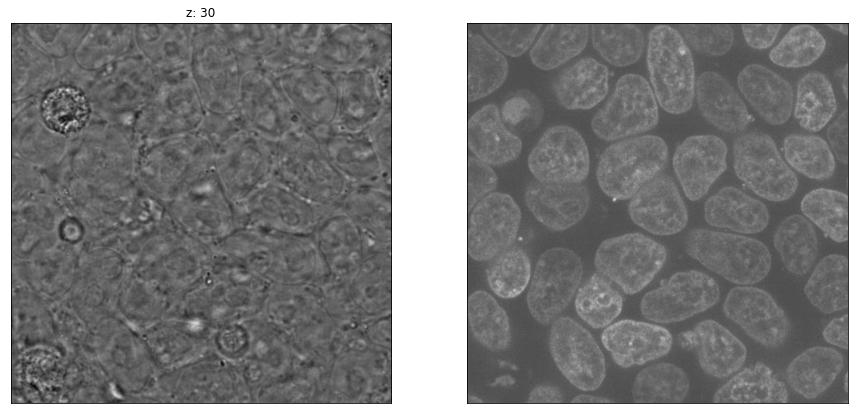

In [2]:
# channel = 0  # membrane
# channel = 2  # nuclear
# channel = 3  # light

matplotlib.rcParams['image.interpolation'] = 'bilinear'  # default is 'nearest'
vol_light = czi_loader.get_volume(3)
vol_nuc = czi_loader.get_volume(2)
# for z in np.linspace(0, vol_light.shape[0], num=5, endpoint=False, dtype=np.int):
for z in [30]:
    img_light = vol_light[z, :, :]
    img_nuc = vol_nuc[z, :, :]
    
    figure = plt.figure(figsize=(15, 15))
    ax = figure.add_subplot(1, 2, 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img_light, cmap='gray', norm=matplotlib.colors.Normalize())

    ax.set_title('z: {:d}'.format(z))
    ax = figure.add_subplot(1, 2, 2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img_nuc, cmap='gray')

    plt.show()

Use AICSImage processing tools to overlay light and nuclear channels.

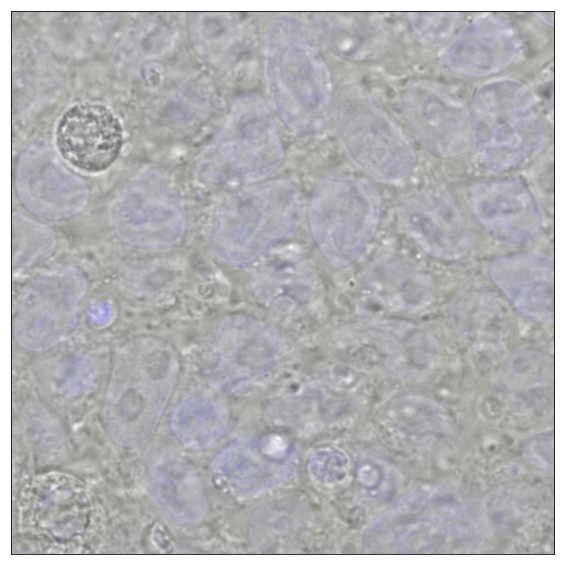

In [3]:
import aicsimage.processing as proc
vol_light_n = vol_light - vol_light.min()
vol_light_n = vol_light_n/vol_light_n.max()
# vol_nuc_n = vol_nuc - vol_nuc.min()
vol_nuc_n = vol_nuc - np.median(vol_nuc)
vol_nuc_n = vol_nuc_n/vol_nuc_n.max()
# print(vol_nuc.min(), vol_nuc.max(), np.median(vol_nuc))

colors = [[.3, .3, .3], [0,0,1]]
proj = proc.imgtoprojection([vol_light_n, vol_nuc_n], proj_method="slice", colors=colors, local_adjust=True)
proj_t = proj.transpose((1, 2, 0))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(proj_t)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Extract n_chunks random chunks from the transmitted light/nuclear volumes.

z: 30


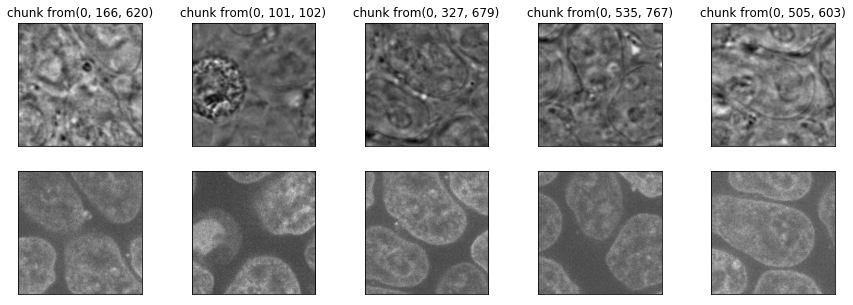

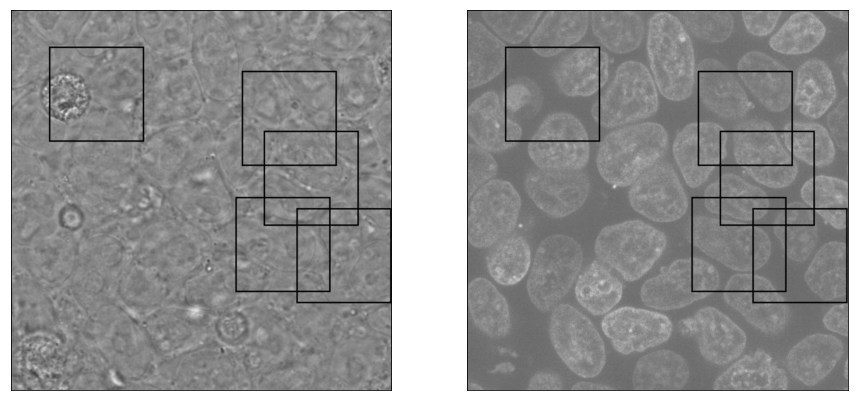

In [4]:
N = 76
n_chunks = 5
dims_chunk = (N, 256, 256)
dims_vol = vol_light.shape
random_coords = [gen_util.pick_random_chunk_coord(dims_vol, dims_chunk) for i in range(n_chunks)]
cubes_light = [gen_util.extract_chunk(vol_light, dims_chunk, random_coords[i]) for i in range(n_chunks)]
cubes_nuc = [gen_util.extract_chunk(vol_nuc, dims_chunk, random_coords[i]) for i in range(n_chunks)]

dims_rect = dims_chunk[1:]

# for z in np.linspace(0, N, num=10, endpoint=False, dtype=np.int):
for z in [30]:
    fig = plt.figure(figsize=(15, 5))
    print('z:', z)
    slice_light = vol_light[z, :, :].copy()
    slice_nuc = vol_nuc[z, :, :].copy()
    for i in range(n_chunks):
        slice_chunk_light = cubes_light[i][z, :, :]
        slice_chunk_nuc = cubes_nuc[i][z, :, :]
        ax = fig.add_subplot(2, n_chunks, i+1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('chunk from' + str(random_coords[i]))
        ax.imshow(slice_chunk_light, cmap='gray')
        ax = fig.add_subplot(2, n_chunks, n_chunks + i+1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.imshow(slice_chunk_nuc, cmap='gray')
        
        coord_rect = random_coords[i][1:]
        gen_util.draw_rect(slice_light, coord_rect, dims_rect, thickness=4)
        gen_util.draw_rect(slice_nuc, coord_rect, dims_rect, thickness=4)
    plt.show()
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(121)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(slice_light, cmap='gray')
    ax = fig.add_subplot(122)
    ax.imshow(slice_nuc, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()